# CIFAR 10 Inference

In [18]:
from keras.datasets import cifar10
from dlhub_sdk.client import DLHubClient
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


def plot_cifar(X, y=None, width=3, height=3):
    cifar_classes = ["airplane", "automobile", "bird", "cat",
                     "deer","dog", "frog", "horse", "ship", "truck"]
    f, (axes) = plt.subplots(width, height, figsize=(6,6), sharex=True, sharey=True)

    image_index = 0
    for i in range(0,width):
        for j in range(0,height):
            axes[i][j].imshow(X[image_index],interpolation='bicubic')
            axes[i][j].set_title('%s'%(cifar_classes[y[image_index][0]]),fontsize =10)
            image_index += 1

## Load CIFAR-10 Data
**Model requires normalized images

In [29]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
n_predict = 50 # Tested safely on 50 (entire file is 10,000 images)

# Normalize images
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train_n = (x_train-mean)/(std+1e-7)
x_test_n = (x_test-mean)/(std+1e-7)

## Initialize DLHub client and make predictions

In [30]:
dl = DLHubClient()

serv = "mschwarting_anl/cifar10_model"
res = dl.run(serv, 
             x_test_n[0:n_predict].tolist())

preds = np.array([[result.index(np.amax(result))] for result in res])

### Collect predicted classes, and check against actual classes

In [31]:
df = pd.DataFrame({ "predicted_class":preds[:,0].tolist(),
                    "actual_class":y_test[0:len(preds)][:,0].tolist()
                  })
df.head()

,predicted_class,actual_class
0,3,3
1,8,8
2,8,8
3,0,0
4,6,6


# Check the model accuracy

In [32]:
accuracy_score(df.actual_class, df.predicted_class)

0.96

## Plot CIFAR images with known labels

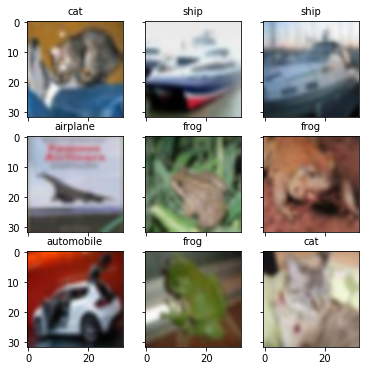

In [33]:
plot_cifar(x_test, y_test, width=3, height=3)

# Plot CIFAR images with predicted labels

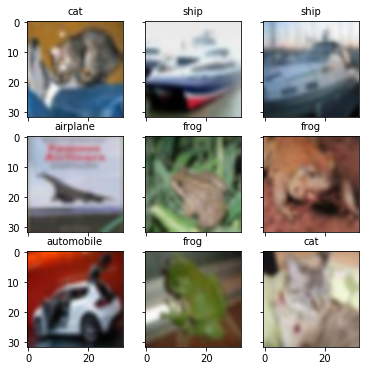

In [34]:
plot_cifar(x_test, preds, width=3, height=3)